In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
#Load the data and store the data into a data frame
data = pd.read_csv('GOOG.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-26,54.325001,54.648499,53.612000,53.990002,53.928635,36218000
1,2019-06-27,54.200001,54.355000,53.764500,53.800499,53.739346,20086000
2,2019-06-28,53.819500,54.049999,53.668499,54.045502,53.984070,33864000
3,2019-07-01,54.900002,55.379002,54.685150,54.897499,54.835098,28726000
4,2019-07-02,55.112000,55.588501,54.908501,55.562500,55.499344,19832000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


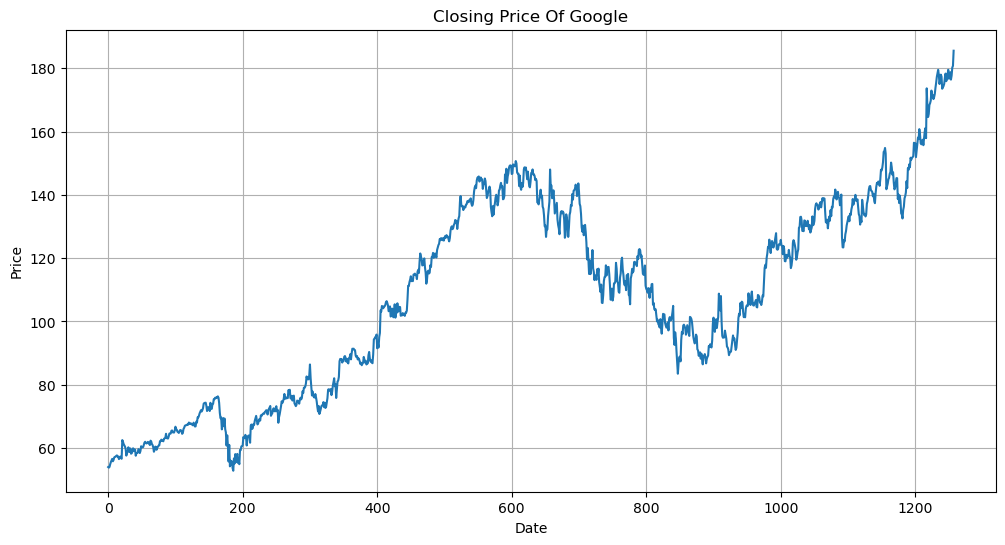

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title("Closing Price Of Google")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [5]:
#Spliting the dataset into training (70%) and testing (30%) set
#Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(880, 7)
(378, 7)


In [6]:
#Using MinMax scaler for normalization of the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [7]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [8]:
data_training_array = scaler.fit_transform(train_close)

In [9]:
x_train = []
y_train = [] 

for i in range(80, data_training_array.shape[0]):
    x_train.append(data_training_array[i-80: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #adding the batch_size axis
x_train.shape

(800, 80, 1)

In [11]:
#Model building(LSTM)
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [12]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu' , return_sequences=False ))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\ghosh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 80, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 80, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 80, 60)              │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 80, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 80, 80)              │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 80, 80)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
#Training the model
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100, batch_size = 32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 201ms/step - loss: 0.2236 - mean_absolute_error: 0.3896
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - loss: 0.0275 - mean_absolute_error: 0.1347
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - loss: 0.0238 - mean_absolute_error: 0.1122
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - loss: 0.0193 - mean_absolute_error: 0.1057
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - loss: 0.0132 - mean_absolute_error: 0.0835
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - loss: 0.0128 - mean_absolute_error: 0.0844
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - loss: 0.0121 - mean_absolute_error: 0.0813
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - loss: 0.0108 - mean_absolute_error: 0.0765
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - loss: 0.0103 - mean_absolute_error: 0.0756
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 221ms/step - loss: 0.0113 - mean_absolute_error: 0.0784
Epoch 11/100
25/25

In [17]:
past_80_days = pd.DataFrame(train_close[-80:])

In [18]:
test_df = pd.DataFrame(test_close)

In [19]:
#Defining the final dataset for testing by including last 80 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.
final_data = pd.concat([past_80_days, test_df], ignore_index=True)

In [20]:
final_data.head()

,0
0,110.339996
1,109.910004
2,109.150002
3,110.550003
4,108.680000


In [21]:
input_data = scaler.fit_transform(final_data)

In [22]:
input_data.shape

(458, 1)

In [23]:
#Testing the model
x_test = []
y_test = []
for i in range(80, input_data.shape[0]):
   x_test.append(input_data[i-80: i])
   y_test.append(input_data[i, 0])

In [24]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(378, 80, 1)
(378,)


In [25]:
#Making prediction and plotting the graph of predicted vs actual values
# Making predictions

y_pred = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 323ms/step


In [26]:
y_pred.shape

(378, 1)

In [27]:
scaler.scale_

array([0.00979528])

In [28]:
scale_factor = 1/0.00979528
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

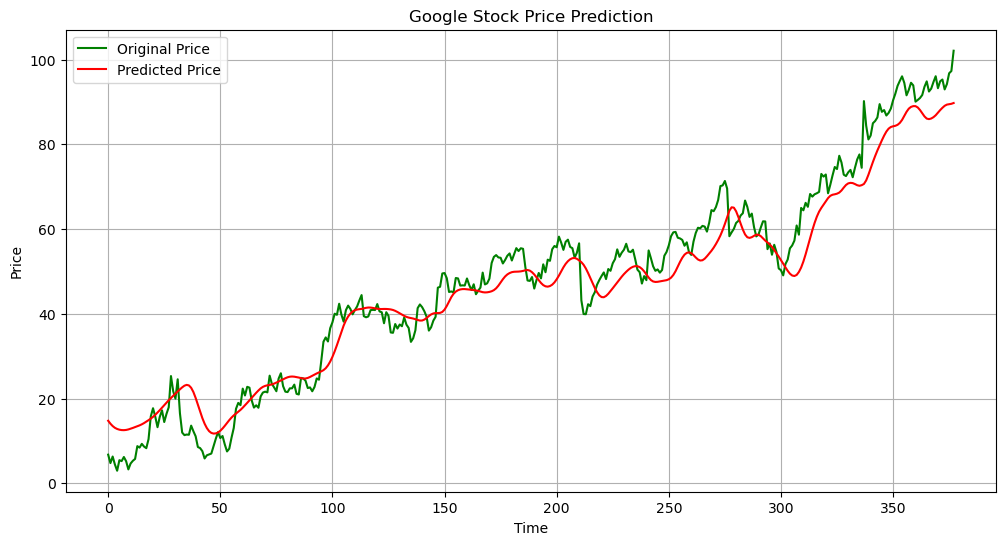

In [29]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'g', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
predictions = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


In [31]:
#Model evaluation
#Calculation of mean absolute error

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 80
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 7.89%


In [32]:
# Calculate Mean Squared Error and R2 Score
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 31.96590202936694


In [33]:
Pred = model.predict(x_test)
Pred = scaler.inverse_transform(Pred)
RMSE = np.sqrt(np.mean(Pred - y_test)**2)
RMSE

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


81.6611461809462

In [34]:
#Calculation of R2 score

from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9444684450716408


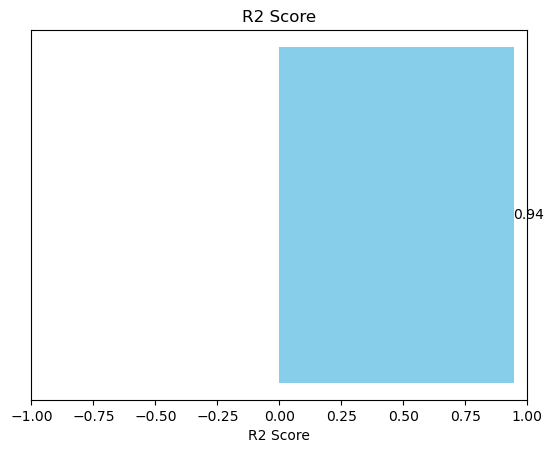

In [35]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

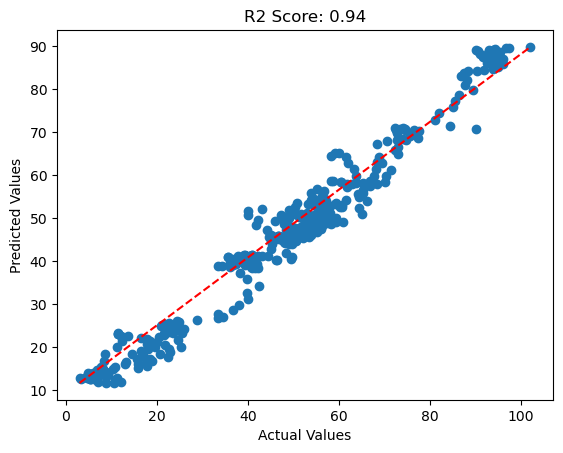

In [36]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()

In [37]:
# Predict future values for 30 days
future_input = input_data[-80:]
future_predictions = []
for _ in range(30):
    future_input = future_input.reshape((1, future_input.shape[0], future_input.shape[1]))
    future_pred = model.predict(future_input)
    future_predictions.append(future_pred[0][0])
    future_input = np.append(future_input[0][1:], future_pred).reshape(-1, 1) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━

In [38]:
# Inverse transform the future predictions
future_predictions = np.array(future_predictions) * scale_factor

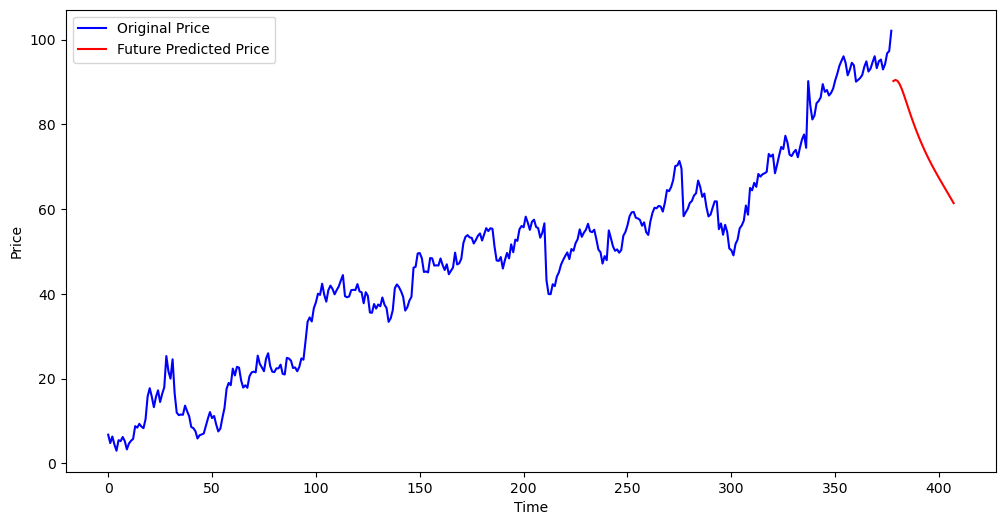

In [39]:
# Plotting the future predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, 'b', label="Original Price")
plt.plot(range(len(y_test), len(y_test) + 30), future_predictions, 'r', label="Future Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()